# Decision Trees

A decision tree is a tree-like model used for both classification and regression tasks in machine learning.

It's a predictive modeling tool that recursively splits the data into subsets based on the most significant attribute(s) at each node. The result is a tree structure where each leaf node represents a class label (for classification) or a numerical value (for regression). Decision trees are easy to understand and interpret, making them a popular choice for both beginners and experienced practitioners.

#### Decision Trees Examples
Same as any classification algorithms, decision trees used for this examples
1. Credit / loan approval.
2. Medical diagnosis.
3. Fraud detection.
4. Web page categorization.

<img src="images/Screenshot (893).png">

Terminologies :-
1. Root node : The most important feature to split the tree.
2. Decision node : Specifies a test on a single feature.
3. Leaf node : Indicates the value of the target feature (decision).
4. Arc/Edge : The split (values) of the feature (decision node).

How we can build a tree that can split the dataset based on the most important features to the next important?

There are three questions we need to answer
1. Which feature will be the starter node (root)?
2. Which node to processd?
3. When to stop to conclusion?

#### Random Split
1. The tree can grow huge.
2. Huge trees = hard to understand.
3. Larger trees less accurate than smaller trees.

Will, this is the splitting criteria, it depends on the problem state.

If the problem is a classification, then there are two popular methods (Information Gain and Entropy method and Gini index method), or if it is a regression problem, then we can use one of these two methods (MSE or MAE).

# 1. Decision Trees

#### C4.5 Algorithm


C4.5 is a classic and widely used algorithm for generating decision trees. It was developed by Ross Quinlan and is an improvement over the earlier ID3 (Iterative Dichotomiser 3) algorithm, addressing some of its limitations. C4.5 is primarily designed for classification tasks, where the goal is to categorize instances into one of several predefined classes.

The algorithm is depending on the information gain and entropy measurements for the features.

The information gain measures how well a given feature separates the training examples according to their target label. The measure is used to select among the candidate features at each step while growing the tree.

The entropy is a measure of impurity or disorder in a set of instances with respect to their class labels.

$$ Entropy(S) = - \sum \limits _{i=1} ^{c} (p_{i} \log_{2}(p_{i})) $$

1. $ S $ : Is the dataset.
2. $ c $ : Is the number of classes in the dataset.
3. $ p_{i} $ : Is the proportion of instances in class i in the set S.

$$ Gain(S, A) = Entropy(S) - \sum \frac{S_{v}}{S} Entropy(S_{v}) $$

1. $S_{v}$ : is the number of instances being in class v of the feature.
2. $Entropy(S_{v})$ : is the entropy of instances being in class v of the feature.

SO, the goal is to find the best features to sort them to split the dataset perfectly.

Therefore, decision trees depends on the dataset (no assumptions) that means it is a **non-parameteric** model.

The algorithm step by step :-

1. Calculate the Entropy of the dataset/subdataset.
2. Calculate the information gain for each feature.
3. Create a decision node.
4. Split the dataset.
5. Repeat the process (if the subset is pure, create a leaf node).

#### Example of building the decision tree

Suppose we have a dataset **S** of COVID-19 infection

The target feature has two possible output (Inflected or Not Inflected).

So, the entropy equation will be :-

$$ Entropy(S) = - p(+) \log_{2}(p(+)) - p(-) \log_{2}(p(-)) $$

| ID | Fever | Cough | Breathing issues | Infected |
|----|-------|-------|------------------|----------|
| 1  | NO    | NO    | NO               | NO       |
| 2  | YES   | YES   | YES              | YES      |
| 3  | YES   | YES   | NO               | NO       |
| 4  | YES   | NO    | YES              | YES      |
| 5  | YES   | YES   | YES              | YES      |
| 6  | NO    | YES   | NO               | NO       |
| 7  | YES   | NO    | YES              | YES      |
| 8  | YES   | NO    | YES              | YES      |
| 9  | NO    | YES   | YES              | YES      |
| 10 | YES   | YES   | NO               | YES      |
| 11 | NO    | YES   | NO               | NO       |
| 12 | NO    | YES   | YES              | YES      |
| 13 | NO    | YES   | YES              | NO       |
| 14 | YES   | YES   | NO               | NO       |

1. First, let us calculate the entropy for the whole dataset **S**

$$ Entropy(S) = - (8/14) \log_{2}(8/14) - (6/14) \log_{2}(6/14) = 0.99 $$

<hr>

2. Now, for each feature we need to calculate the information gain

    - Information gain of Fever

Calculate the Entropy for the (Fever = YES)

| ID | Fever | Cough | Breathing issues | Infected |
|----|-------|-------|------------------|----------|
| 2  | YES   | YES   | YES              | YES      |
| 3  | YES   | YES   | NO               | NO       |
| 4  | YES   | NO    | YES              | YES      |
| 5  | YES   | YES   | YES              | YES      |
| 7  | YES   | NO    | YES              | YES      |
| 8  | YES   | NO    | YES              | YES      |
| 10 | YES   | YES   | NO               | YES      |
| 14 | YES   | YES   | NO               | NO       |

$$ Entropy(Fever=YES) = - (6/8) \log_{2}(6/8) - (2/8) \log_{2}(2/8) = 0.81 $$

Calculate the Entropy for the (Fever = NO)

| ID | Fever | Cough | Breathing issues | Infected |
|----|-------|-------|------------------|----------|
| 1  | NO    | NO    | NO               | NO       |
| 6  | NO    | YES   | NO               | NO       |
| 9  | NO    | YES   | YES              | YES      |
| 11 | NO    | YES   | NO               | NO       |
| 12 | NO    | YES   | YES              | YES      |
| 13 | NO    | YES   | YES              | NO       |

$$ Entropy(Fever=NO) = - (2/6) \log_{2}(2/6) - (4/6) \log_{2}(4/6) = 0.91 $$

Calculate the Information Gain for the Fever

$$ IG(S, Fever) = Entropy(S) - \frac{\left\lvert S_{YES} \right\rvert}{\left\lvert S \right\rvert} *  Entropy(Fever=YES) - \frac{\left\lvert S_{NO} \right\rvert}{\left\lvert S \right\rvert} *  Entropy(Fever=NO) $$

$$ IG(S, Fever) = 0.99 - \frac{8}{14} *  0.81 - \frac{6}{14} *  0.91 = 0.13 $$

<hr>

    - Information gain of Cough

Calculate the Entropy for the (Cough = YES)

| ID | Fever | Cough | Breathing issues | Infected |
|----|-------|-------|------------------|----------|
| 2  | YES   | YES   | YES              | YES      |
| 3  | YES   | YES   | NO               | NO       |
| 5  | YES   | YES   | YES              | YES      |
| 6  | NO    | YES   | NO               | NO       |
| 9  | NO    | YES   | YES              | YES      |
| 10 | YES   | YES   | NO               | YES      |
| 11 | NO    | YES   | NO               | NO       |
| 12 | NO    | YES   | YES              | YES      |
| 13 | NO    | YES   | YES              | NO       |
| 14 | YES   | YES   | NO               | NO       |

$$ Entropy(Cough=YES) = - (5/10) \log_{2}(5/10) - (5/10) \log_{2}(5/10) = 1 $$

Calculate the Entropy for the (Cough = NO)

| ID | Fever | Cough | Breathing issues | Infected |
|----|-------|-------|------------------|----------|
| 1  | NO    | NO    | NO               | NO       |
| 4  | YES   | NO    | YES              | YES      |
| 7  | YES   | NO    | YES              | YES      |
| 8  | YES   | NO    | YES              | YES      |

$$ Entropy(Cough=NO) = - (3/4) \log_{2}(3/4) - (1/4) \log_{2}(1/4) = 0.81 $$

Calculate the Information Gain for the Cough

$$ IG(S, Cough) = Entropy(S) - \frac{\left\lvert S_{YES} \right\rvert}{\left\lvert S \right\rvert} *  Entropy(Cough=YES) - \frac{\left\lvert S_{NO} \right\rvert}{\left\lvert S \right\rvert} *  Entropy(Cough=NO) $$

$$ IG(S, Fever) = 0.99 - \frac{10}{14} *  1 - \frac{4}{14} *  0.81 = 0.04 $$

<hr>

    - Information gain of Breathing Issues

Calculate the Entropy for the (Breathing Issues = YES)

| ID | Fever | Cough | Breathing issues | Infected |
|----|-------|-------|------------------|----------|
| 2  | YES   | YES   | YES              | YES      |
| 4  | YES   | NO    | YES              | YES      |
| 5  | YES   | YES   | YES              | YES      |
| 7  | YES   | NO    | YES              | YES      |
| 8  | YES   | NO    | YES              | YES      |
| 9  | NO    | YES   | YES              | YES      |
| 12 | NO    | YES   | YES              | YES      |
| 13 | NO    | YES   | YES              | NO       |

$$ Entropy(Breathing=NO) = - (7/8) \log_{2}(7/8) - (1/8) \log_{2}(1/8) = 0.54 $$

Calculate the Entropy for the (Breathing Issues = NO)

| ID | Fever | Cough | Breathing issues | Infected |
|----|-------|-------|------------------|----------|
| 1  | NO    | NO    | NO               | NO       |
| 3  | YES   | YES   | NO               | NO       |
| 6  | NO    | YES   | NO               | NO       |
| 10 | YES   | YES   | NO               | YES      |
| 11 | NO    | YES   | NO               | NO       |
| 14 | YES   | YES   | NO               | NO       |

$$ Entropy(Breathing=NO) = - (1/6) \log_{2}(1/6) - (5/6) \log_{2}(5/6) = 0.65 $$

Calculate the Information Gain for the Breathing Issues

$$ IG(S, Breathing) = Entropy(S) - \frac{\left\lvert S_{YES} \right\rvert}{\left\lvert S \right\rvert} *  Entropy(Cough=YES) - \frac{\left\lvert S_{NO} \right\rvert}{\left\lvert S \right\rvert} *  Entropy(Cough=NO) $$

$$ IG(S, Breathing) = 0.99 - \frac{8}{14} *  0.54 - \frac{6}{14} *  0.65 = 0.4 $$

<hr>

We have

1. Fever Gain = 0.13
2. Cough Gain = 0.04
3. Breathing issues Gain = 0.4

So, the root will be the Breathing issues feature.

3. Now, let us build the decision node

<img src="images/Screenshot (895).png">

4. Repeat the process to build the tree based on the same process we did.

We will split the dataset into two subsets (the number of range value in the root, which is in our case the Breathing issues).

<hr>

The first subest $ (S | Breathing = YES)

| ID | Fever | Cough | Breathing issues | Infected |
|----|-------|-------|------------------|----------|
| 2  | YES   | YES   | YES              | YES      |
| 4  | YES   | NO    | YES              | YES      |
| 5  | YES   | YES   | YES              | YES      |
| 7  | YES   | NO    | YES              | YES      |
| 8  | YES   | NO    | YES              | YES      |
| 9  | NO    | YES   | YES              | YES      |
| 12 | NO    | YES   | YES              | YES      |
| 13 | NO    | YES   | YES              | NO       |

The second subest $ (S | Breathing = NO)

| ID | Fever | Cough | Breathing issues | Infected |
|----|-------|-------|------------------|----------|
| 1  | NO    | NO    | NO               | NO       |
| 3  | YES   | YES   | NO               | NO       |
| 6  | NO    | YES   | NO               | NO       |
| 10 | YES   | YES   | NO               | YES      |
| 11 | NO    | YES   | NO               | NO       |
| 14 | YES   | YES   | NO               | NO       |

We need to calculate the Information gain for the rest features.

First using the first subset and we will get this :-

$$ Entropy(S | Breathing = YES) = - (7/8) \log_{2}(7/8) - (1/8) \log_{2}(1/8) $$

We will use this Entropy (not the $Entropy(S) = 0.99$).

The information gain for the Fever :-

$$ Gain(S | Breathing=YES, Fever) = 0.2 $$

The information gain for the Cough :-

$$ Gain(S | Breathing=YES, Cough) = 0.09 $$

So, we will select the Fever feature.

<img src="images/Screenshot (897).png">

We can se, we have a lot of arcs (edges) that means, does we need to choose the edge randomly or edge by edge (by level or depth). Yes we need to choose them one by one by the level.

Do not forget that we have only one feature remaining (cough).

So, it will be the selected one.

<img src="images/Screenshot (899).png">

Now, because we have build the tree and we select all the features. So, we need to select the leaf nodes (decisions), also, based on the dataset itself.

<hr>

1. If the Breathing issues = YES and Fever = YES, the dataset will be :-

| ID | Fever | Cough | Breathing issues | Infected |
|----|-------|-------|------------------|----------|
| 2  | YES   | YES   | YES              | YES      |
| 4  | YES   | NO    | YES              | YES      |
| 5  | YES   | YES   | YES              | YES      |
| 7  | YES   | NO    | YES              | YES      |
| 8  | YES   | NO    | YES              | YES      |

We can see that the target label always **Infected**. So, the leaf node (decision node) will be YES.

2. If the Breathing issues = YES and Fever = NO, the dataset will be :-

| ID | Fever | Cough | Breathing issues | Infected |
|----|-------|-------|------------------|----------|
| 9  | NO    | YES   | YES              | YES      |
| 12 | NO    | YES   | YES              | YES      |
| 13 | NO    | YES   | YES              | NO       |

We can see that the target label has YES as the **most** repeated value, so the decision node will be **Infected**.

Therefore, the Fever is not a decisionable node. So, if you have a Breathing issues, the decision will be directly **Infected**.

3. Same thing with Cough, we will see that the cough will have **Not Infected** for the two branches, so, the final decision tree will be as follows :-

## Training decision using sklearn

In [1]:
import sys                             # Read system parameters.
import os                              # Interact with the operating system.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib                      # Create 2D charts.
import matplotlib.pyplot as plt
import seaborn as sb                   # Perform data visualization.
import scipy as sp                     # Perform scientific computing and advanced mathematics.
import sklearn                         # Perform data mining and analysis.
from time import time                  # Calculate training time.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sb.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

# Load the dataset.
PROJECT_ROOT_DIR = "."
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "titanic_data")
print('Data files in this project:', os.listdir(DATA_PATH))
data_raw_file = os.path.join(DATA_PATH, 'train.csv')
data_raw = pd.read_csv(data_raw_file)
print('Loaded {} records from {}.'.format(len(data_raw), data_raw_file))

Libraries used in this project:
- Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.26.1
- pandas 1.5.3
- Matplotlib 3.8.0
- Seaborn 0.11.2
- SciPy 1.11.2
- scikit-learn 1.2.2

Data files in this project: ['test.csv', 'train.csv']
Loaded 891 records from .\titanic_data\train.csv.


In [2]:
from sklearn.model_selection import train_test_split

label_columns = ['Survived']

training_columns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

X_train, X_val, y_train, y_val = train_test_split(
    data_raw[training_columns],
    data_raw[label_columns],
    random_state = 1912
)

print('The training and validation datasets and labels have been split.')

The training and validation datasets and labels have been split.


In [3]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
617,618,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
242,243,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
82,83,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
398,399,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S


In [4]:
# Perform common cleaning and feature engineering tasks on datasets.
def prep_dataset(dataset):
    
    # Fill missing Age values with the median age.
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    # Fill missing Fare values with the median fare.
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

    # Fill missing Embarked values with the mode.
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    
    # ONE-HOT ENCODING
    
    cols = ['Pclass', 'Sex', 'Embarked']
    
    for i in cols:
        dummies = pd.get_dummies(dataset[i], prefix = i, drop_first = False)
        dataset = pd.concat([dataset, dummies], axis = 1)

    return dataset

X_train = prep_dataset(X_train.copy())
X_val = prep_dataset(X_val.copy())

print('The dataset has been cleaned and prepared.')

The dataset has been cleaned and prepared.


In [5]:
# Drop unused columns from datasets.
def drop_unused(dataset):
        
    dataset = dataset.drop(['PassengerId'], axis = 1)
    dataset = dataset.drop(['Cabin'], axis = 1)
    dataset = dataset.drop(['Ticket'], axis = 1)
    dataset = dataset.drop(['Name'], axis = 1)

    # These have been replaced with one-hot encoding.
    dataset = dataset.drop(['Pclass'], axis = 1)
    dataset = dataset.drop(['Sex'], axis = 1)
    dataset = dataset.drop(['Embarked'], axis = 1)
    
    return dataset

X_train = drop_unused(X_train.copy())
X_val = drop_unused(X_val.copy())

print('Columns that will not be used for training have been dropped.')

Columns that will not be used for training have been dropped.


In [6]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
439,31.0,0,0,10.5000,0,1,0,0,1,0,0,1
617,26.0,1,0,16.1000,0,0,1,1,0,0,0,1
242,29.0,0,0,10.5000,0,1,0,0,1,0,0,1
82,27.5,0,0,7.7875,0,0,1,1,0,0,1,0
398,23.0,0,0,10.5000,0,1,0,0,1,0,0,1


In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 1912, criterion='entropy')
start = time()
tree.fit(X_train, np.ravel(y_train))
end = time()
train_time = (end - start) * 1000

prediction = tree.predict(X_val)

# Score using the validation data.
score = tree.score(X_val, y_val)

print('Decision tree model took {:.2f} milliseconds to fit.'.format(train_time))
print('Accuracy: {:.0f}%'.format(score * 100))

Decision tree model took 3.53 milliseconds to fit.
Accuracy: 78%


In [14]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image, display 
import pydotplus as pdotp

def plot_tree(model, image):
    dot_data = StringIO()
    export_graphviz(model, out_file = dot_data, 
                    filled = True,
                    rounded = True,
                    special_characters = True, 
                    feature_names = X_train.columns.values.tolist(),
                    class_names = ['0', '1'])

    graph = pdotp.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(image)
    Image(graph.create_png())
    
print('A function to plot the decision tree structure has been defined.')

A function to plot the decision tree structure has been defined.


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def model_scores(y, prediction):
    acc = accuracy_score(y, prediction)
    print('Accuracy: {:.0f}%'.format(np.round(acc * 100)))
    
    precision = precision_score(y, prediction)
    print('Precision: {:.0f}%'.format(np.round(precision * 100)))
    
    recall = recall_score(y, prediction)
    print('Recall: {:.0f}%'.format(np.round(recall * 100)))
    
    f1 = f1_score(y, prediction)
    print('F1: {:.0f}%'.format(np.round(f1 * 100)))
    
print('A function to compute the model scores has been defined.')

A function to compute the model scores has been defined.


In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def roc(y, prediction_proba):
    fpr, tpr, thresholds = roc_curve(y, prediction_proba)
    
    plt.plot(fpr, tpr);
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.0]);
    plt.title('ROC Curve');
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate');
    plt.grid(True);
    
    auc = roc_auc_score(y, prediction_proba)
    print('Area Under Curve: {:.2f}'.format(auc))
    
print('A function to generate the ROC curve and compute AUC has been defined.')

A function to generate the ROC curve and compute AUC has been defined.


In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def prc(y, prediction_proba):
    precision, recall, thresholds = precision_recall_curve(y, prediction_proba)
    
    plt.plot(recall, precision);
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.0]);
    plt.title('Precision–Recall Curve');
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    plt.grid(True);
    
    ap = average_precision_score(y, prediction_proba)
    print('Average Precision: {:.2f}'.format(ap))
    
print('A function to generate the PRC and compute average precision has been defined.')

A function to generate the PRC and compute average precision has been defined.



(process:12100): GLib-GIO-WARNING **: 19:23:14.742: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2309.16.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:12100): GLib-GIO-WARNING **: 19:23:14.823: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.1108.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs


(process:7636): GLib-GIO-WARNING **: 19:23:16.494: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2309.16.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:7636): GLib-GIO-WARNING **: 19:23:16.556: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.1108.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs



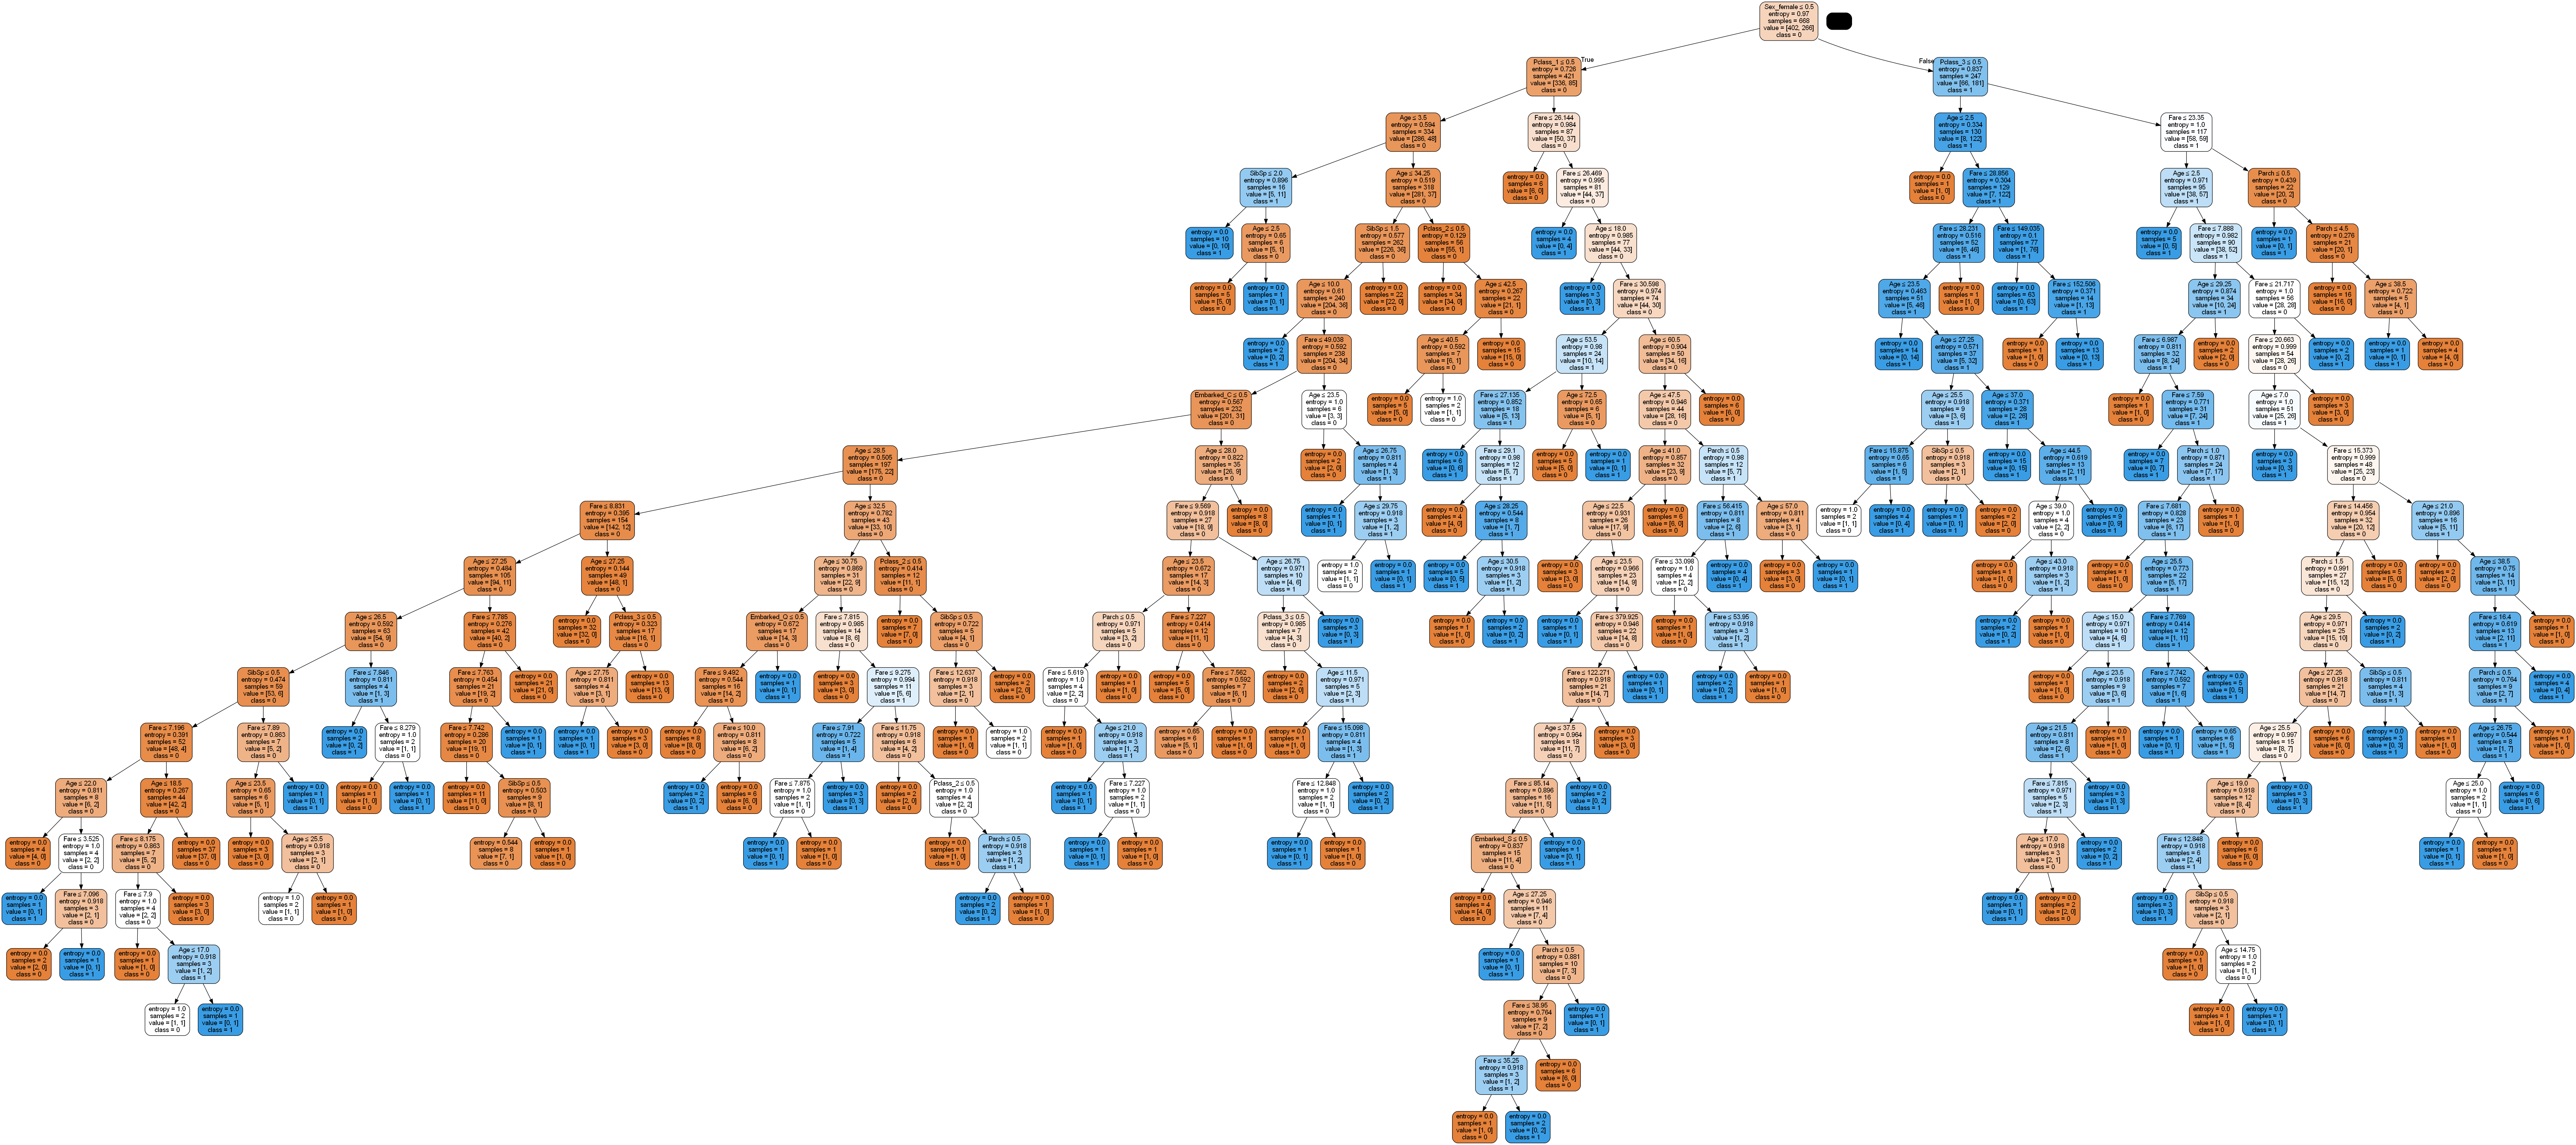

In [18]:
plot_tree(tree, 'titanic.png')
display(Image('titanic.png'))

In [19]:
initial_predict = tree.predict(X_val)
model_scores(y_val, initial_predict)

Accuracy: 78%
Precision: 68%
Recall: 66%
F1: 67%


Area Under Curve: 0.75


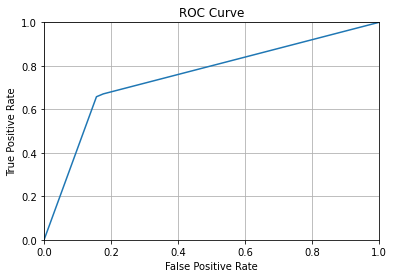

In [20]:
initial_predict_proba = tree.predict_proba(X_val)

roc(y_val, initial_predict_proba[:, 1])

Average Precision: 0.57


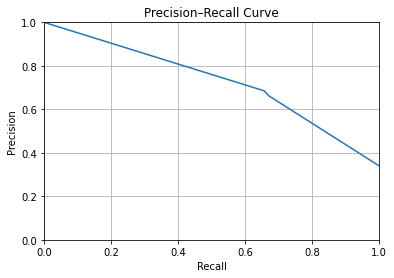

In [21]:
prc(y_val, initial_predict_proba[:, 1])

In [25]:
from sklearn.tree import DecisionTreeClassifier

pruned_tree = DecisionTreeClassifier(max_depth = 4, random_state = 1912, criterion='entropy')
start = time()
pruned_tree.fit(X_train, np.ravel(y_train))
end = time()
train_time = (end - start) * 1000

prediction = pruned_tree.predict(X_val)

# Score using the validation data.
score = pruned_tree.score(X_val, y_val)

print('Decision tree model took {:.2f} milliseconds to fit.'.format(train_time))
print('Accuracy: {:.0f}%'.format(score * 100))

Decision tree model took 3.00 milliseconds to fit.
Accuracy: 84%


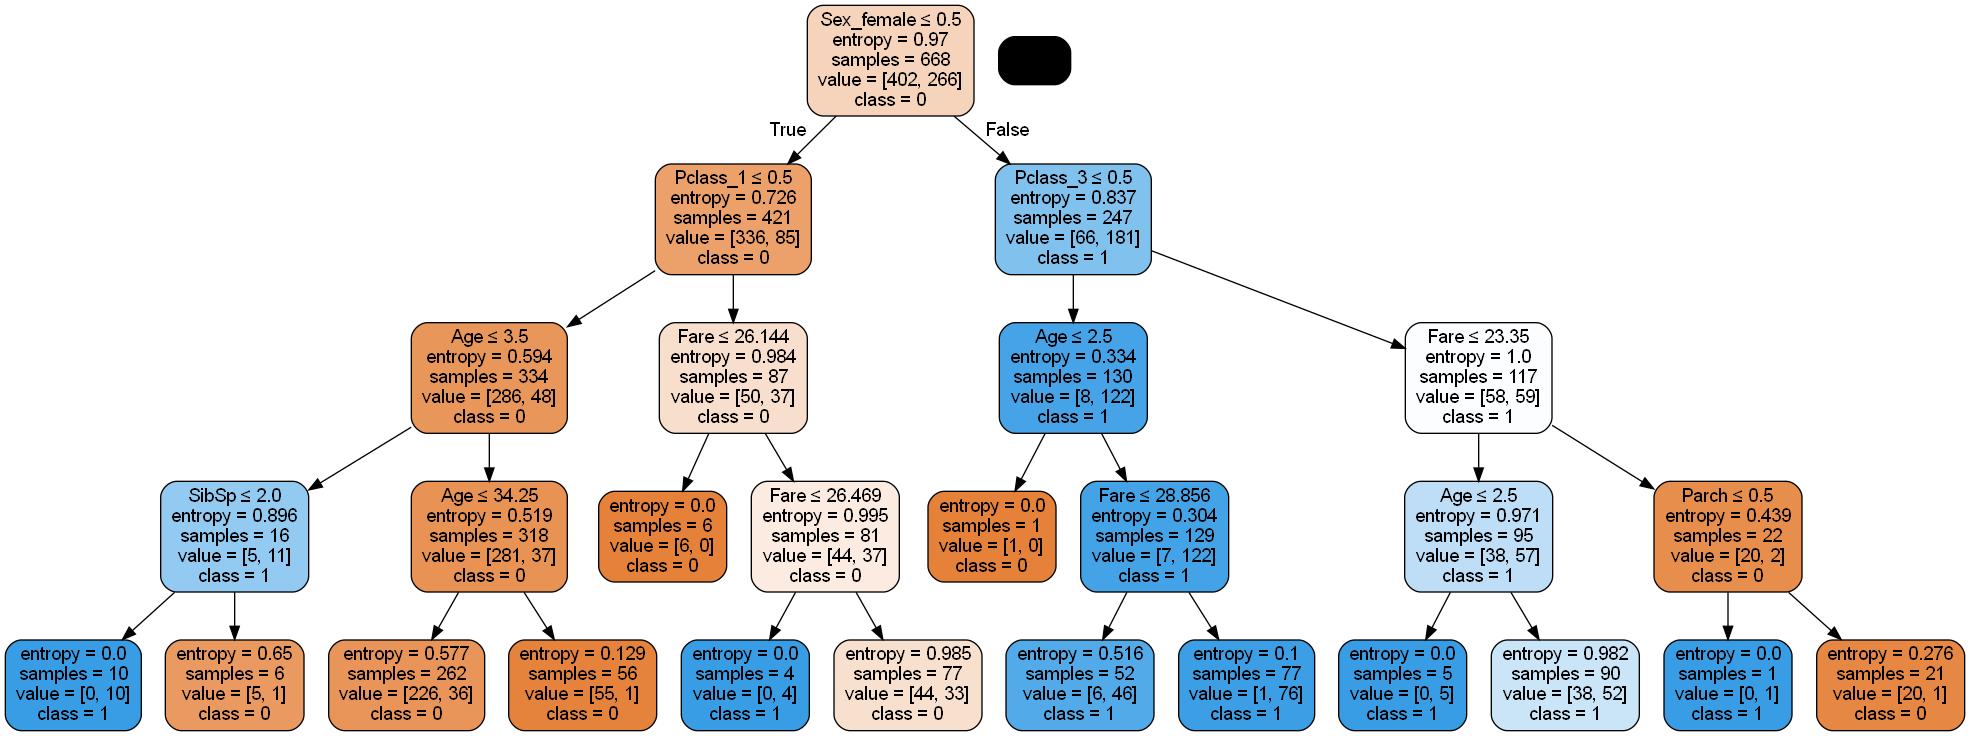

In [26]:
plot_tree(pruned_tree, 'titanic_pruned.png')
display(Image('titanic_pruned.png'))

In [27]:
pruned_predict = pruned_tree.predict(X_val)
model_scores(y_val, pruned_predict)

Accuracy: 84%
Precision: 82%
Recall: 67%
F1: 74%


Area Under Curve: 0.83


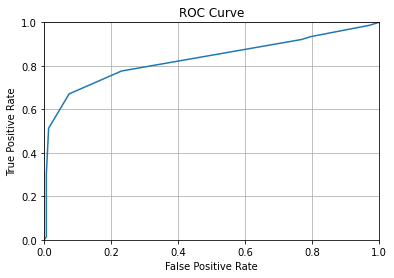

In [28]:
pruned_predict_proba = pruned_tree.predict_proba(X_val)

roc(y_val, pruned_predict_proba[:, 1])

Average Precision: 0.76


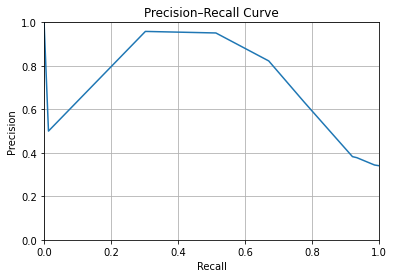

In [29]:
prc(y_val, pruned_predict_proba[:, 1])

# 2. Ensemble Learning

Decision trees can enter an overfitting, so that the decision tree is to large and overfit.

There are several solutions, include :-

1. Ensemble learning.
2. Pruning the trees.
3. Collect more data.

Ensemble methods are a type of machine learning technique that combines the predictions of multiple individual models to improve overall performance and generalization. The idea is that by combining the strengths of different models, the ensemble can often achieve better results than any individual model on its own.

There are several methods depends on the ensemble learning :-

1. Bagging (Bootstrap Aggregating):

In bagging, multiple instances of the same learning algorithm are trained on different subsets of the training data. Each model is trained independently, and their predictions are then averaged or voted upon to make a final prediction. Random Forest is a popular ensemble algorithm that uses bagging.

2. Boosting:

Boosting focuses on training multiple weak learners sequentially, with each one trying to correct the errors of its predecessor. The final prediction is a weighted sum of the individual model predictions. AdaBoost and Gradient Boosting are examples of boosting algorithms.

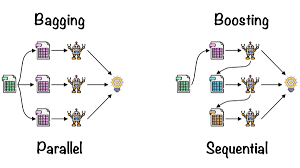

# 3. Random Forests

Random Forest is an ensemble learning method that belongs to the bagging family of ensemble methods. It is designed to improve the performance and robustness of decision trees, which are prone to overfitting.

- Bootstrapped sampling :

It creates multiple decision trees by training on random subsets of the training data with replacement.

- Voting :

When making predictions, the random forest combines the predictions of all the individual trees.

<img src="images/Screenshot (900).png">

In [30]:
import sys                             # Read system parameters.
import os                              # Interact with the operating system.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib                      # Create 2D charts.
import matplotlib.pyplot as plt
import seaborn as sb                   # Perform data visualization.
import sklearn                         # Perform data mining and analysis.
from time import time                  # Calculate training time.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sb.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

# Load the dataset.
PROJECT_ROOT_DIR = "."
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "titanic_data")
print('Data files in this project:', os.listdir(DATA_PATH))
data_raw_file = os.path.join(DATA_PATH, 'train.csv')
data_raw = pd.read_csv(data_raw_file)
print('Loaded {} records from {}.'.format(len(data_raw), data_raw_file))

Libraries used in this project:
- Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.26.1
- pandas 1.5.3
- Matplotlib 3.8.0
- Seaborn 0.11.2
- scikit-learn 1.2.2

Data files in this project: ['test.csv', 'train.csv']
Loaded 891 records from .\titanic_data\train.csv.


In [31]:
# Separate training and test sets already exist.
# A validation set will be split off from the training sets.

from sklearn.model_selection import train_test_split

# 'Survived' is the dependent variable (value to be predicted), so it will be
# removed from the training data and put into a separate DataFrame for labels.
label_columns = ['Survived']

training_columns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

# Split the training and validation datasets and their labels.
X_train, X_val, y_train, y_val = train_test_split(data_raw[training_columns],
                                                                            data_raw[label_columns],
                                                                            random_state = 1912)

print('The datasets and labels have been split.')

The datasets and labels have been split.


In [32]:
# Perform common cleaning and feature engineering tasks on datasets.
def prep_dataset(dataset):
    
    # PROVIDE MISSING VALUES
    
    # Fill missing Age values with the median age.
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    # Fill missing Fare values with the median fare.
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

    # Fill missing Embarked values with the mode.
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    
    # ONE-HOT ENCODING
    
    cols = ['Pclass', 'Sex', 'Embarked']
    
    for i in cols:
        dummies = pd.get_dummies(dataset[i], prefix = i, drop_first = False)
        dataset = pd.concat([dataset, dummies], axis = 1)

    return dataset

X_train = prep_dataset(X_train.copy())

X_val = prep_dataset(X_val.copy())

print('The datasets have been cleaned and prepared.')

The datasets have been cleaned and prepared.


In [33]:
# Drop unused columns from datasets.
def drop_unused(dataset):
        
    dataset = dataset.drop(['PassengerId'], axis = 1)
    dataset = dataset.drop(['Cabin'], axis = 1)
    dataset = dataset.drop(['Ticket'], axis = 1)
    dataset = dataset.drop(['Name'], axis = 1)

    # These have been replaced with one-hot encoding.
    dataset = dataset.drop(['Pclass'], axis = 1)
    dataset = dataset.drop(['Sex'], axis = 1)
    dataset = dataset.drop(['Embarked'], axis = 1)
    
    return dataset

X_train = drop_unused(X_train.copy())

X_val = drop_unused(X_val.copy())

print('Unused columns have been dropped.')

Unused columns have been dropped.


In [46]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100,
                                criterion = 'entropy',
                                max_depth = 6,
                                min_samples_leaf = 10,
                                min_samples_split = 78,
                                bootstrap = True,
                                oob_score = True,
                                random_state = 1912)

forest.fit(X_train, np.ravel(y_train))

prediction = forest.predict(X_val)

# Score using the validation data.
score = forest.score(X_val, y_val)

print('Accuracy: {:.0f}%'.format(score * 100))

Accuracy: 84%


In [47]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image, display 
import pydotplus as pdotp

def plot_tree(model, image):
    dot_data = StringIO()
    export_graphviz(model, out_file = dot_data, 
                    filled = True,
                    rounded = True,
                    special_characters = True, 
                    feature_names = X_train.columns.values.tolist(),
                    class_names = ['0', '1'])

    graph = pdotp.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(image)
    Image(graph.create_png())
    
print('The visualization function has been defined.')

The visualization function has been defined.


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def model_scores(y, prediction):
    acc = accuracy_score(y, prediction)
    print('Accuracy: {:.0f}%'.format(np.round(acc * 100)))
    
    precision = precision_score(y, prediction)
    print('Precision: {:.0f}%'.format(np.round(precision * 100)))
    
    recall = recall_score(y, prediction)
    print('Recall: {:.0f}%'.format(np.round(recall * 100)))
    
    f1 = f1_score(y, prediction)
    print('F1: {:.0f}%'.format(np.round(f1 * 100)))
    
print('The function to show the scores has been defined.')

The function to show the scores has been defined.


In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def roc(y, prediction_proba):
    fpr, tpr, thresholds = roc_curve(y, prediction_proba)
    
    plt.plot(fpr, tpr);
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.0]);
    plt.title('ROC Curve');
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate');
    plt.grid(True);
    
    auc = roc_auc_score(y, prediction_proba)
    print('Area Under Curve: {:.2f}'.format(auc))
    
print('The function to generate the ROC curve and compute AUC has been defined.')

The function to generate the ROC curve and compute AUC has been defined.


In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def prc(y, prediction_proba):
    precision, recall, thresholds = precision_recall_curve(y, prediction_proba)
    
    plt.plot(recall, precision);
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.0]);
    plt.title('Precision–Recall Curve');
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    plt.grid(True);
    
    ap = average_precision_score(y, prediction_proba)
    print('Average Precision: {:.2f}'.format(ap))
    
print('The function to generate a PRC and compute average precision has been defined.')

The function to generate a PRC and compute average precision has been defined.


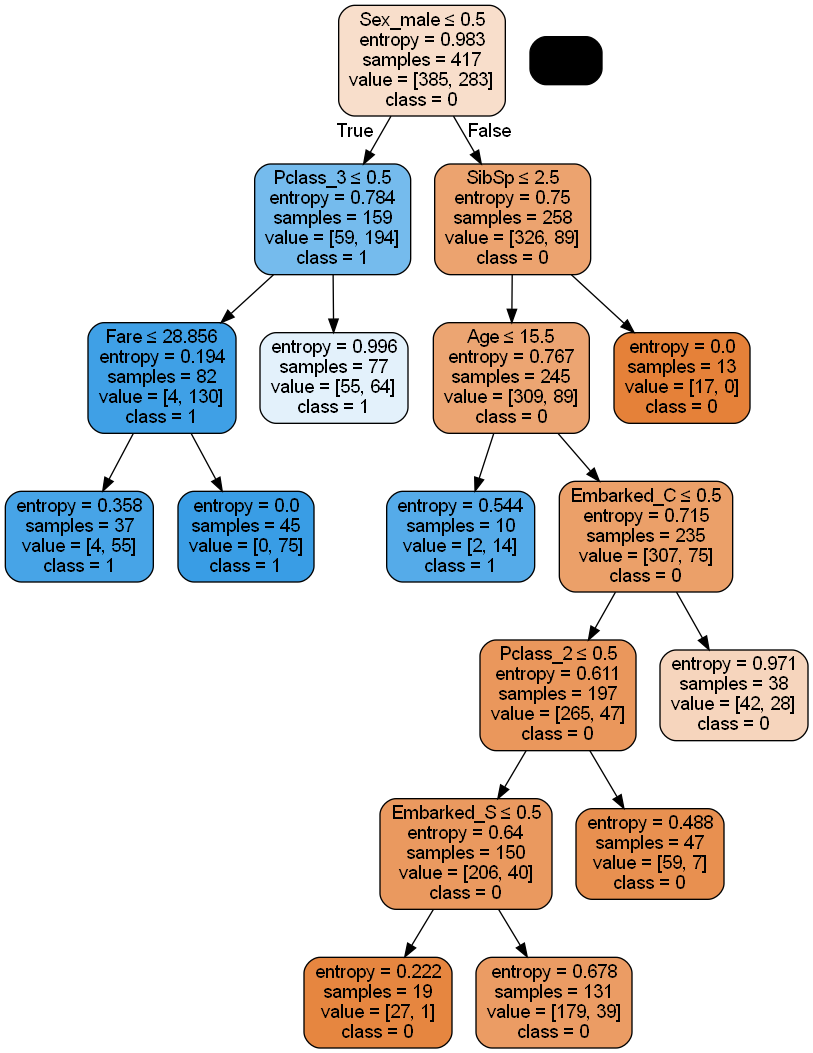

In [51]:
plot_tree(forest.estimators_[0], 'titanic_forest_tree0.png')
display(Image('titanic_forest_tree0.png'))

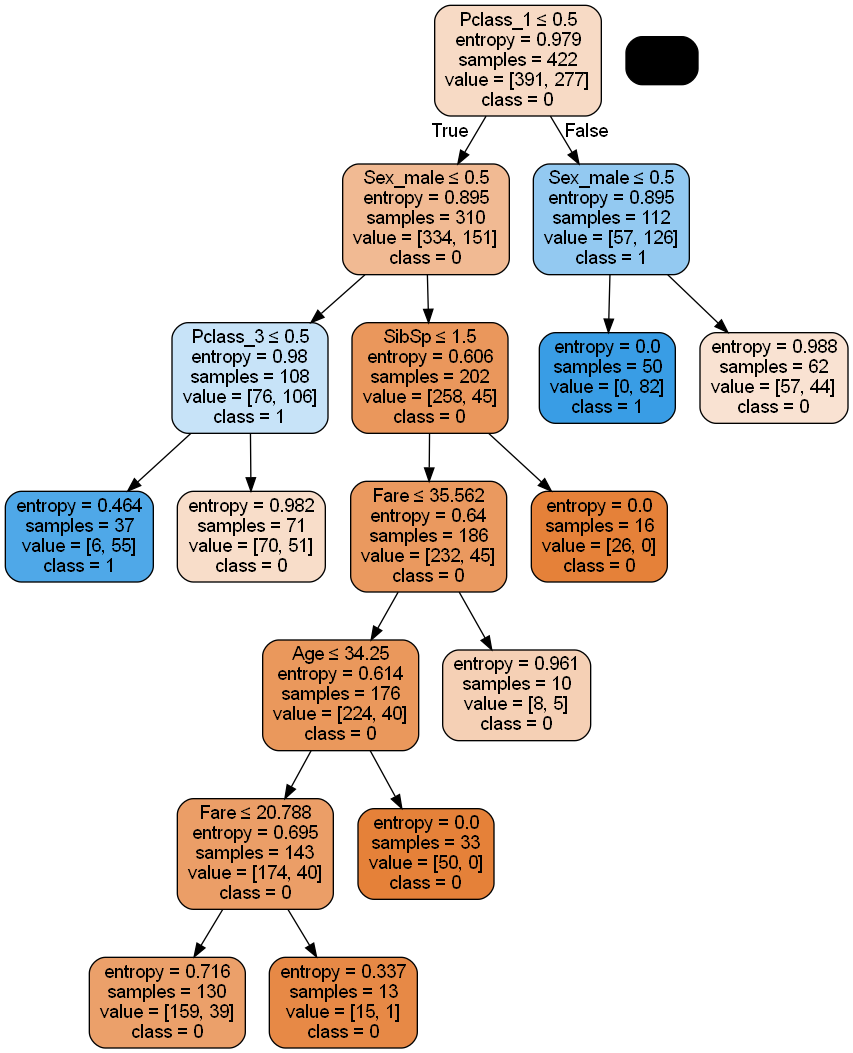

In [52]:
plot_tree(forest.estimators_[1], 'titanic_forest_tree1.png')
display(Image('titanic_forest_tree1.png'))

In [53]:
model_scores(y_val, prediction)

Accuracy: 84%
Precision: 82%
Recall: 67%
F1: 74%


Area Under Curve: 0.85


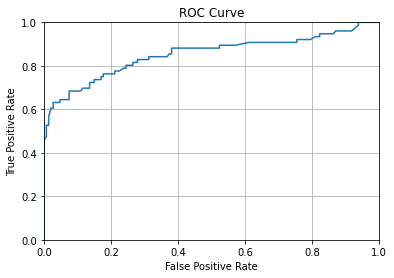

In [54]:
predict_proba = forest.predict_proba(X_val)

roc(y_val, predict_proba[:, 1])

Average Precision: 0.84


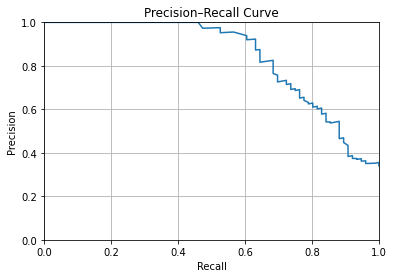

In [55]:
prc(y_val, predict_proba[:, 1])